### Sequence Composition

+ GC, AT Content
+ Automatically Calculates the gc_content

In [3]:
from skbio import DNA,RNA,Protein,Sequence

In [5]:
dna_seq = DNA("ATGATCTCGTAA")

In [6]:
# Get GC Content: Returns a percentage of GC as compared to the whole
dna_seq.gc_content()

0.3333333333333333

In [8]:
# Custom GC Content
def gc_content(seq):
    return float(seq.count("G") + seq.count("C"))/len(seq) * 100

In [9]:
gc_content(dna_seq)

33.33333333333333

In [7]:
# Get GC Frequency: Counts the number of G and C in your Sequence
dna_seq.gc_frequency()

4

In [10]:
# Custom GC Freq
def gc_freq(seq):
    return seq.count("G") + seq.count("C")

In [11]:
gc_freq(dna_seq)

4

In [12]:
# AT Content
def at_content(seq):
    return float(seq.count("A") + seq.count("T"))/len(seq) * 100

In [14]:
at_content(dna_seq)

66.66666666666666

In [15]:
# AT Frequency
def at_freq(seq):
    return seq.count("A") + seq.count("T")

In [16]:
at_freq(dna_seq)

8

In [ ]:
# Difference Between GC_content and GC_frequency


In [17]:
# Get Frequencies of each Nucleotide
dna_seq.frequencies()

{'A': 4, 'C': 2, 'G': 2, 'T': 4}

In [18]:
from collections import Counter

In [20]:
Counter(str(dna_seq))

Counter({'A': 4, 'T': 4, 'G': 2, 'C': 2})

<BarContainer object of 4 artists>

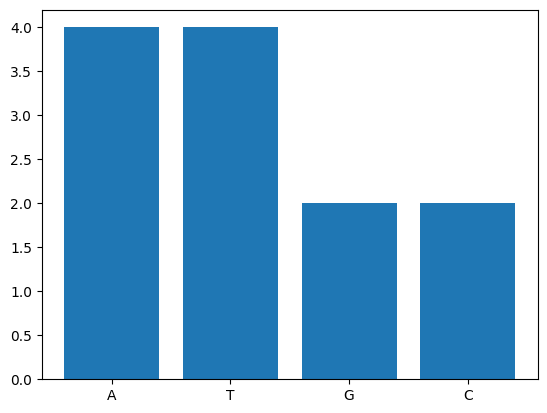

In [22]:
# Plot of Nucleotides
import matplotlib.pyplot as plt
plt.bar(Counter(str(dna_seq)).keys(), Counter(str(dna_seq)).values())